In [61]:
from IPython.display import HTML

HTML('''<script>
code_show=true; 
function code_toggle() {
 if (code_show){
 $('div.input').hide();
 } else {
 $('div.input').show();
 }
 code_show = !code_show
} 
$( document ).ready(code_toggle);
</script>
<form action="javascript:code_toggle()"><input type="submit" value="Click here to toggle on/off the raw code."></form>''')

In [62]:
import pandas as pd
import matplotlib.pyplot as plt
from math import sqrt
from IPython.display import display
import numpy as np

df = pd.read_csv("pcap.csv")
df.head()

,No.,Time,Source,Destination,Protocol,Length,Info
0,1,0.000000,18.211.118.21,192.168.1.248,TCP,66,443 > 33100 [ACK] Seq=1 Ack=1 Win=17 Len=0 T...
1,2,0.000465,18.211.118.21,192.168.1.248,TLSv1.2,122,Application Data
2,3,0.433247,149.112.112.112,192.168.1.248,TCP,66,443 > 52906 [ACK] Seq=1 Ack=1 Win=588 Len=0 ...
3,4,0.579567,149.112.112.112,192.168.1.248,TLSv1.2,313,Application Data
4,5,1.048138,208.85.40.20,192.168.1.248,TCP,66,443 > 42740 [ACK] Seq=1 Ack=1 Win=65535 Len=...


## Outliers

Up to this point, I have been playing with the Length field.  Outliers are classified by our textbook as 

$$ x < Q_1 - 1.5(IQR) \cup Q_3 + 1.5(IQR) < x $$

The five number summary from Week 5 is:
```
First quartile:         66.0
Second quartile:        81.5
Third quartile:        134.0
Range:                 760.0
IQR:                    68.0
Standard dev:          190.0
```

In [63]:
Q1 = 66.0
Q3 = 134.0
IQR = 68.0
outliers = df.Length[(df.Length < (Q1 - 1.5 * IQR)) | (df.Length > (Q3 + 1.5 * IQR))]
print("Outliers:")
for v in sorted(outliers):
    print(v)

Outliers:
274
313
320
816
820


If you refer back to the histogram from Week 5, you can see that my data set is heavily skewed to the right.  This was not a "sampled" packet capture, so there is nothing here that appears to me out of the ordinary.  However, if this was a typical random sample from a production network, I would definitely be interested to see what was generating all of those small packets!

## Boxplot

The histogram certainly shows the skewness of the data, but I think the boxplot does an excellent job as well.  Here it is clear that the data points are stacked up near the small values.  It also makes me ponder whether the data points < 400 should be considered true outliers or not.

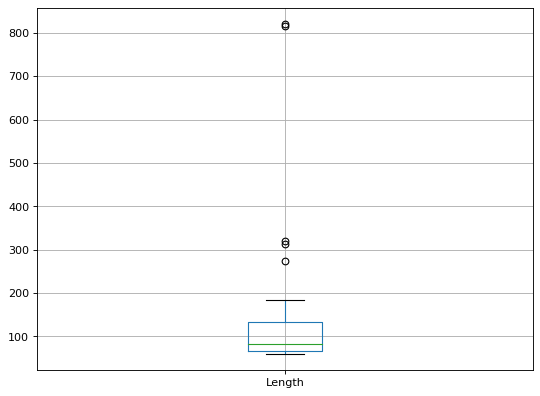

In [64]:
from matplotlib.pyplot import figure
figure(num=None, figsize=(8, 6), dpi=80, facecolor='w', edgecolor='k')
       
df.boxplot("Length")
plt.show()

## Sample correlation

Unfortunately, my data set only has a single "interesting" quantitative variable - "Length".  The other quantitative variable is "Time", but there is nothing mysterious about its values.  However, the show must go on!  Let's use what we have and see if there is any correlation between time and packet length.  😃

This scatter plot is all over the place as you might have guessed.

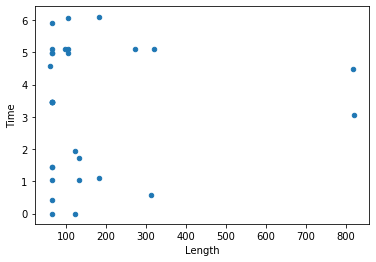

In [65]:
_ = df.plot.scatter(x="Length", y="Time")

Here is a nice visualization of the correlations.  Time and Length have a r-value of 0.066, which is no surprise after looking at the scatter plot above.  

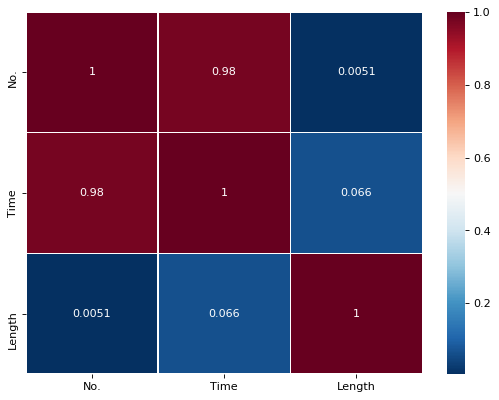

In [66]:
import seaborn as sb

figure(num=None, figsize=(8, 6), dpi=80, facecolor='w', edgecolor='k')

pearsoncorr = df.corr(method='pearson')
sb.heatmap(pearsoncorr, 
            xticklabels=pearsoncorr.columns,
            yticklabels=pearsoncorr.columns,
            cmap='RdBu_r',
            annot=True,
            linewidth=0.5)
plt.show()